<a href="https://colab.research.google.com/github/VithGab/-Data_Sciences_VG/blob/main/ATV_dt_scien_VG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving atividade3_dataset.csv to atividade3_dataset.csv


{'atividade3_dataset.csv': b'ID;Nome;Idade;Cidade;Produto;Pre\xc3\xa7o;Quantidade;Data_Compra\n1;Mariana;48.0;FORTALEZA;Tablet;2010,87;7;30-05-2024\n2;Bruno;42.0;RIO DE JANEIRO;Teclado;;6;12-04-2025\n3;Ana;54.0;RIO DE JANEIRO;Monitor;3619.29;2;10-12-2022\n4;Carlos;62.0;CURITIBA;Teclado;40415.9;8;31-12-2022\n5;Mariana;60.0;CURITIBA;Notebook;716.66;8;14-09-2023\n6;Mariana;18.0;SALVADOR;Headset;2388.44;8;23-02-2024\n7;Ana;61.0;PORTO ALEGRE;Headset;2363.09;4;28-02-2025\n8;Jo\xc3\xa3o;21.0;S\xc3\x83O PAULO;Monitor;2080.54;10;01-01-2024\n9;Carlos;65.0;curitiba;Tablet;4229,63;3;26-12-2023\n10;Maria;36.0;MANAUS;Notebook;3101.25;7;18-05-2024\n11;Fernanda;32.0;BELO HORIZONTE;Headset;1515.12;1;21-11-2023\n12;Maria;40.0;CURITIBA;Mouse;4096.38;4;24-07-2023\n13;Ana;30.0;FORTALEZA;Monitor;;1;16-11-2023\n14;Lucas;61.0;MANAUS;Smartphone;;3;14-03-2023\n15;Carlos;67.0;FORTALEZA;Tablet;971.26;10;29-01-2024\n16;Julia;26.0;S\xc3\x83O PAULO;Smartphone;4495.69;10;09-06-2024\n17;Pedro;58.0;RIO DE JANEIRO;Table

In [3]:
import pandas as pd

df = pd.read_csv('atividade3_dataset.csv', sep=';')

print(df.head())

   ID     Nome  Idade          Cidade   Produto    Preço  Quantidade  \
0   1  Mariana   48.0       FORTALEZA    Tablet  2010,87           7   
1   2    Bruno   42.0  RIO DE JANEIRO   Teclado      NaN           6   
2   3      Ana   54.0  RIO DE JANEIRO   Monitor  3619.29           2   
3   4   Carlos   62.0        CURITIBA   Teclado  40415.9           8   
4   5  Mariana   60.0        CURITIBA  Notebook   716.66           8   

  Data_Compra  
0  30-05-2024  
1  12-04-2025  
2  10-12-2022  
3  31-12-2022  
4  14-09-2023  


In [13]:
#Found null values
#Verificando existência de nulls
print(df.isnull().sum())

ID             0
Nome           0
Idade          0
Cidade         0
Produto        0
Preço          0
Quantidade     0
Data_Compra    0
dtype: int64


In [14]:
#Average
#Tirando média
mean_idade = df['Idade'].mean()
mean_preco = df['Preço'].str.replace(',', '.').astype(float).mean()

print(f"Mean age: {mean_idade}")
print(f"Mean price: {mean_preco}")

Mean age: 44.27402862985685
Mean price: 3120.137864693446


In [15]:
#Changing the nulls rows, puting average
#Colocando média no lugar dos valores nulos
df['Idade'].fillna(mean_idade, inplace=True)
df['Preço'].fillna(mean_preco, inplace=True)

/tmp/ipython-input-3494741089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Idade'].fillna(mean_idade, inplace=True)


In [16]:
#Checking
print(df.isnull().sum())

ID             0
Nome           0
Idade          0
Cidade         0
Produto        0
Preço          0
Quantidade     0
Data_Compra    0
dtype: int64


In [17]:
#Identifying duplicate rows
#Identificando linhas duplicadas para remover posteriormente
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

      ID      Nome      Idade        Cidade     Produto    Preço  Quantidade  \
500  362  Fernanda  44.274029  Porto Alegre  Smartphone  1689.08           7   
501   74    Carlos  39.000000     São Paulo      Tablet  4035.86           9   
502  375     Maria  38.000000     Fortaleza       Mouse  2072.31           7   
504  105   Mariana  23.000000      Salvador  Smartphone  2588.98           7   
505  395     Bruno  46.000000      Curitiba     Headset   3321.2           2   
506  378   Mariana  62.000000        Manaus      Tablet  3282.26           3   
507  125      João  24.000000        Manaus     Headset  4529.67           5   
509  451    Carlos  56.000000      Salvador     Monitor  3383.77           8   

    Data_Compra  
500  07-05-2025  
501  27-08-2023  
502  11-05-2025  
504  23-02-2025  
505  24-08-2023  
506  19-05-2025  
507  19-02-2025  
509  04-02-2024  


In [19]:
#removing and checking duplicate rows
df.drop_duplicates(inplace=True)

print(df.duplicated().sum())

0


In [20]:
#Changing the first letter and display to check
#Padronização com title(), para deixar os nomes das cidades todos
#com a mesma formatação
df['Cidade'] = df['Cidade'].str.title()
print(df['Cidade'].head())

0         Fortaleza
1    Rio De Janeiro
2    Rio De Janeiro
3          Curitiba
4          Curitiba
Name: Cidade, dtype: object


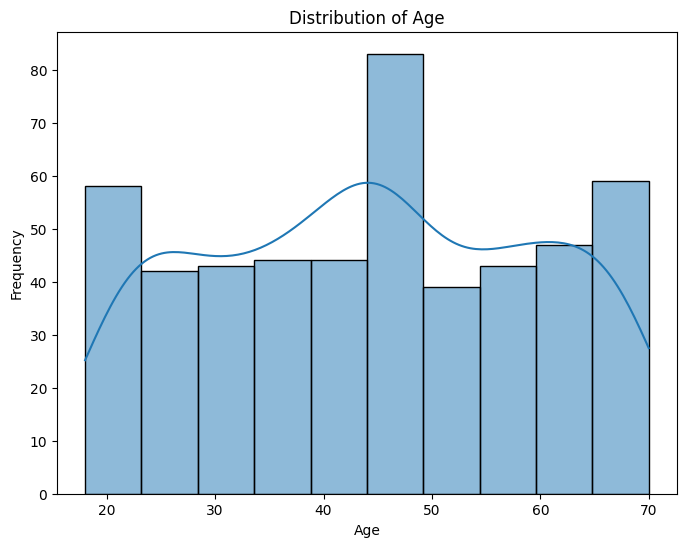

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

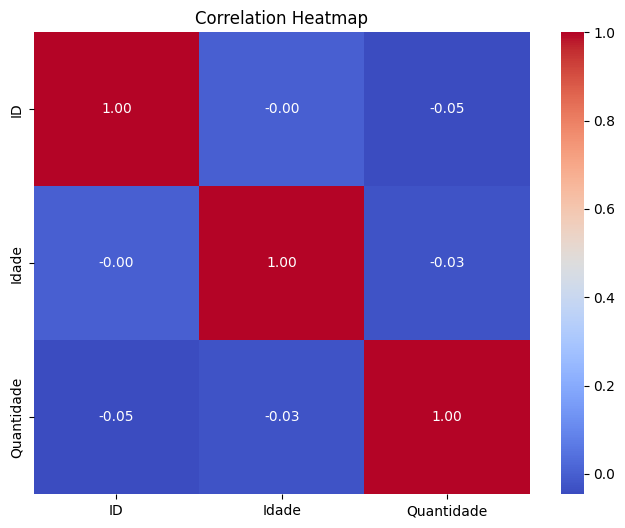

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [28]:
#Median and deviation values
#Foi feito apenas mediana e desvio pois já existe média
median_values = df.median(numeric_only=True)

print("\nMedian Values:")
print(median_values)

std_dev_values = df.std(numeric_only=True)

print("\nStandard Deviation Values:")
print(std_dev_values)


Median Values:
ID            249.500000
Idade          44.274029
Quantidade      6.000000
dtype: float64

Standard Deviation Values:
ID            144.481631
Idade          15.028173
Quantidade      2.861006
dtype: float64


In [30]:
# Creating "Faixa_Etaria" column
#Criado a coluna de faixa_etária para qualificar cada faixa.
age_bins = [0, 12, 17, 35, 59, float('inf')]
age_labels = ['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto', 'Idoso']

df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=age_bins, labels=age_labels, right=False)

print(df[['Idade', 'Faixa_Etaria']].head())

   Idade Faixa_Etaria
0   48.0       Adulto
1   42.0       Adulto
2   54.0       Adulto
3   62.0        Idoso
4   60.0        Idoso
